# Stiffness

A problem is said to be stiff when the step size $h$ is constrained by stability requirements rather than accuracy requirements.

In this code, we will explore a simple example with the following Cauchy problem:

$$ \begin{cases}y'(t) = -\lambda y(t) + \sin(t)\\ y(0) = 0\end{cases} $$

With a high value of $\lambda$, e.g. $\lambda=1000$

We will proceed as follows:

1. Derive the exact solution of the problem using dsolve (or computing it manually).
2. Analyze the behavior of the explicit Euler method, pushing it to the limit of its stability region, i.e., using the maximum step size $h$ before losing stability.
3. Compare the results with those obtained using ODE45, an adaptive step-size method based on explicit Runge-Kutta.
4. Finally, analyze ODE15s, a method designed for stiff problems, based on implicit schemes similar to BDF methods, which are known for their greater stability in these contexts.

## Exact Solution

NOTE: The Symbolic Math Toolbox package must be installed.

In [36]:
%reset
clear;
close all;
clc;

syms y(t) lambda

dsolve(diff(y,t) == -lambda*y + sin(t), y(0) == 0)

## Forward Euler (AKA Explicit Euler)

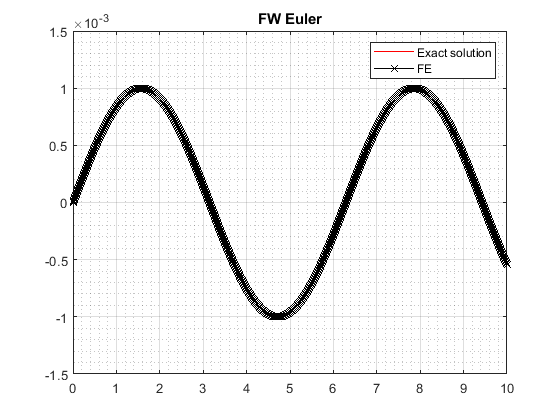

In [38]:
%reset
clear;
close all;
clc;
lambda=1000;
fun = @(t,y) -lambda*y + sin(t);
y = @(t) exp(-lambda*t)/(lambda^2 + 1) - (cos(t) - lambda*sin(t))/(lambda^2 + 1);
h = 2/lambda*0.99; % passo
tf = 10;
N = ceil(tf/h); % numero intervalli, assumendo t0 = 0
u = zeros(1,N+1);
t = linspace(0,tf,N+1);
u(1) = 0;
for n = 1:N
    u(n+1)=u(n)+h*fun(t(n),u(n)); % Eulero in avanti
end
figure;
plot(t,y(t),"Color","r");
hold on;
plot(t,u,"x-", "Color","black");
title("FW Euler");
legend("Exact solution", "FE");
grid on;
grid minor;

In [38]:
N

N = 5051

We can observe that when using Forward Euler (also known as Explicit Euler), we are forced to use a very high number of nodes to approximate a seemingly simple function (a sine wave). Notice how we have chosen almost the minimum number of nodes possible (5051); if we had chosen slightly fewer, we would have exited the stability region.

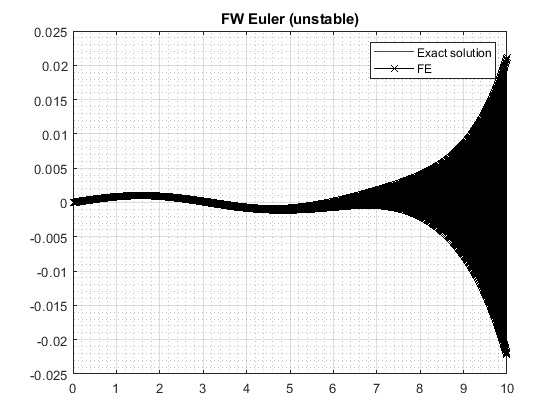

In [40]:
%reset
clear;
close all;
clc;
lambda=1000;
fun = @(t,y) -lambda*y + sin(t);
y = @(t) exp(-lambda*t)/(lambda^2 + 1) - (cos(t) - lambda*sin(t))/(lambda^2 + 1);
h = 2/lambda*1.001; % passo
tf = 10;
N = ceil(tf/h); % numero intervalli, assumendo t0 = 0
u = zeros(1,N+1);
t = linspace(0,tf,N+1);
u(1) = 0;
for n = 1:N
    u(n+1)=u(n)+h*fun(t(n),u(n)); % Eulero in avanti
end
figure;
plot(t,y(t),"Color","r");
hold on;
plot(t,u,"x-", "Color","black");
title("FW Euler (unstable)");
legend("Exact solution", "FE");
grid on;
grid minor;

In [65]:
N

N = 4996

## ODE45

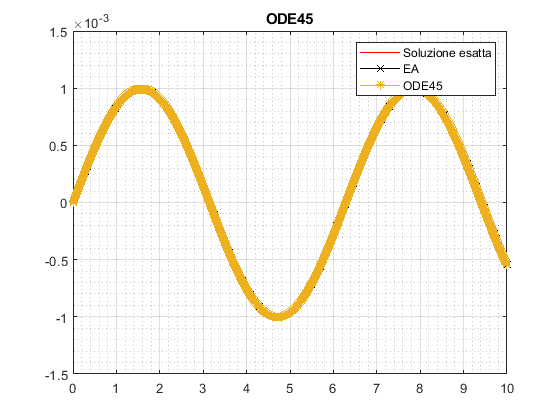

In [26]:
clear;
close all;
clc;
lambda=1000;
fun = @(t,y) -lambda*y + sin(t);
y = @(t) exp(-lambda*t)/(lambda^2 + 1) - (cos(t) - lambda*sin(t))/(lambda^2 + 1);
h = 2/lambda*0.99; % passo
tf = 10;
N = ceil(tf/h); % numero intervalli, assumendo t0 = 0
u = zeros(1,N+1);
t = linspace(0,tf,N+1);
u(1) = 0;
for n = 1:N
    u(n+1)=u(n)+h*fun(t(n),u(n)); % Eulero in avanti
end
figure;
plot(t,y(t),"Color","r");
hold on;
plot(t,u,"x-", "Color","black");
grid on;
grid minor;
[t,uode45] = ode45(fun,[0,tf],0);
plot(t,uode45,'-*');
title("ODE45")
legend("Exact solution", "FE", "ODE45");

In [28]:
whos

  Name            Size              Bytes  Class              Attributes

  N               1x1                   8  double                       
  fun             1x1                  32  function_handle              
  h               1x1                   8  double                       
  lambda          1x1                   8  double                       
  n               1x1                   8  double                       
  t           12053x1               96424  double                       
  tf              1x1                   8  double                       
  u               1x5052            40416  double                       
  uode45      12053x1               96424  double                       
  y               1x1                  32  function_handle              



Even ODE45 uses an excessive number of nodes, more than twice as many as FE (12053)!

## ODE15s

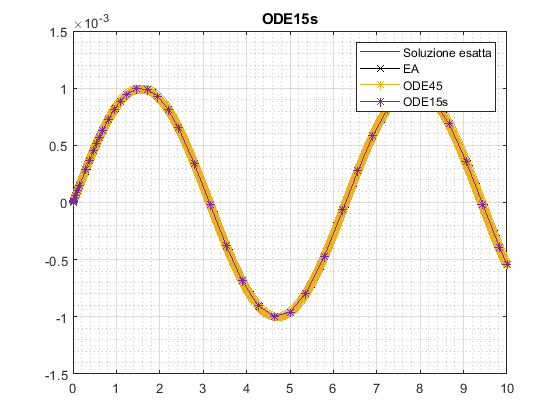

In [4]:
clear;
close all;
clc;
lambda=1000;
fun = @(t,y) -lambda*y + sin(t);
y = @(t) exp(-lambda*t)/(lambda^2 + 1) - (cos(t) - lambda*sin(t))/(lambda^2 + 1);
h = 2/lambda*0.99; % passo
tf = 10;
N = ceil(tf/h); % numero intervalli, assumendo t0 = 0
u = zeros(1,N+1);
t = linspace(0,tf,N+1);
u(1) = 0;
for n = 1:N
    u(n+1)=u(n)+h*fun(t(n),u(n)); % Eulero in avanti
end
figure;
plot(t,y(t),"Color","r");
hold on;
plot(t,u,"x-", "Color","black");
title("Eulero in avanti");
grid on;
grid minor;
[t,uode45] = ode45(fun,[0,tf],0);
plot(t,uode45,'-*');
title("ODE45")
[t,uode15s] = ode15s(fun,[0,tf],0);
plot(t,uode15s,'-*');
title("ODE15s")
legend("Soluzione esatta", "EA", "ODE45","ODE15s");


In [6]:
whos

  Name             Size              Bytes  Class              Attributes

  N                1x1                   8  double                       
  fun              1x1                  32  function_handle              
  h                1x1                   8  double                       
  lambda           1x1                   8  double                       
  n                1x1                   8  double                       
  t               46x1                 368  double                       
  tf               1x1                   8  double                       
  u                1x5052            40416  double                       
  uode15s         46x1                 368  double                       
  uode45       12053x1               96424  double                       
  y                1x1                  32  function_handle              



Notice that, in this last case, by using ODE15s, we were able to obtain a good approximation of the problem's solution using only 46 nodes! This represents a significant space-saving compared to the methods examined previously. These results confirm the theoretical findings: for Stiff problems, it is always advisable to use numerical methods with high stability, and in particular, indirect methods become excellent candidates.